In [1]:
# Importing required library
import re

# Define the mapping
mapping = {
    'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F', 
    'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L', 
    'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R', 
    'SER': 'S', 'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'
}

# Function to replace all three-letter abbreviations in a string
def replace_abbreviations(text):
    for k, v in mapping.items():
        text = text.replace(k, v)
    return text

# Read the input file
with open('D:/GLUTnewpymissense/GLUT13.txt', 'r') as file:
    data = file.read()

# Replace abbreviations
result = replace_abbreviations(data)

# Print the result
#print(result)

with open('D:/GLUTnewpymissense/GLUT13_new.txt', 'w') as file:
    file.write(result)


In [15]:
from collections import defaultdict

# Initialize a dictionary to store the sum and count of numerical values for each letter
letter_dict = defaultdict(lambda: {'sum': 0, 'count': 0})

# Open the .txt file
with open('D:/GLUTnewpymissense/GLUT14.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Remove unwanted characters
        line = line.replace('[', '').replace(']', '').replace(',', '')
        
        # Split the line into words
        words = line.split()
        
        # The first word is the numerical value
        num_val = float(words[0])
        
        # The rest of the words are letters
        letters = words[1:]
        
        # For each letter, add the numerical value to the sum and increment the count
        for letter in letters:
            letter_dict[letter]['sum'] += num_val
            letter_dict[letter]['count'] += 1

# Calculate the average for each letter and print the results
for letter, data in letter_dict.items():
    avg = data['sum'] / data['count']
    print(f'The average for {letter} is {avg}')

# Calculate the average for each letter
#letter_avgs = {letter: data['sum'] / data['count'] for letter, data in letter_dict.items()}

# Convert the dictionary to a DataFrame
#df = pd.DataFrame(list(letter_avgs.items()), columns=['Letter', 'Average'])

# Get the file name without the extension
#file_name = os.path.splitext(file_path)[0]

# Create a new file name by appending '_avg' to the original file name
#new_file_name = f'{file_name}_avg.txt'

# Save the DataFrame to the new file
#df.to_csv(new_file_name, index=False)





The average for 'G' is 0.6569230769230768
The average for 'E' is 0.5224
The average for 'W' is 0.844
The average for 'R' is 0.5319047619047619
The average for 'F' is 0.7194736842105263
The average for 'P' is 0.6604545454545454
The average for 'T' is 0.44028571428571445
The average for 'M' is 0.603125
The average for 'Y' is 0.564
The average for 'S' is 0.5011111111111111
The average for 'Q' is 0.4949999999999999
The average for 'N' is 0.4595000000000001
The average for 'V' is 0.5736842105263156
The average for 'C' is 0.6770000000000002
The average for 'I' is 0.6302173913043478
The average for 'A' is 0.5174999999999997
The average for 'L' is 0.5684999999999998
The average for 'H' is 0.20000000000000004
The average for 'K' is 0.3821428571428571
The average for 'D' is 0.32499999999999996


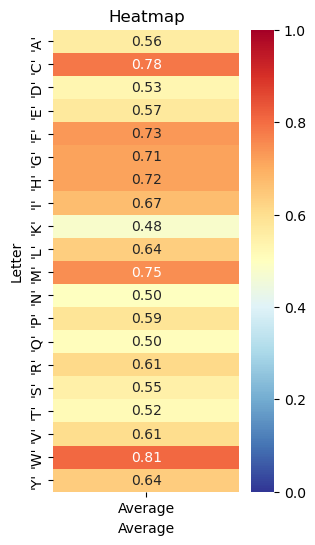

In [3]:
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a dictionary to store the sum and count of numerical values for each letter
letter_dict = defaultdict(lambda: {'sum': 0, 'count': 0})

# Open the .txt file
with open('D:/GLUTnewpymissense/GLUT13_new.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Remove unwanted characters
        line = line.replace('[', '').replace(']', '').replace(',', '')
        
        # Split the line into words
        words = line.split()
        
        # The first word is the numerical value
        num_val = float(words[0])
        
        # The rest of the words are letters
        letters = words[1:]
        
        # For each letter, add the numerical value to the sum and increment the count
        for letter in letters:
            letter_dict[letter]['sum'] += num_val
            letter_dict[letter]['count'] += 1

# Calculate the average for each letter
letter_avg = {}
for letter, data in letter_dict.items():
    avg = data['sum'] / data['count']
    letter_avg[letter] = avg

# Convert the result into a DataFrame
result_df = pd.DataFrame(list(letter_avg.items()), columns=['Letter', 'Average'])

# Create a heatmap using Seaborn with annotations
plt.figure(figsize=(3, 6))
ax = sns.heatmap(result_df.pivot_table(index='Letter', values='Average'), cmap='RdYlBu_r', annot=True, fmt=".2f", vmin=0, vmax=1)
plt.xlabel('Average')
plt.ylabel('Letter')
plt.title('Heatmap')

# Display the heatmap in the notebook
plt.show()



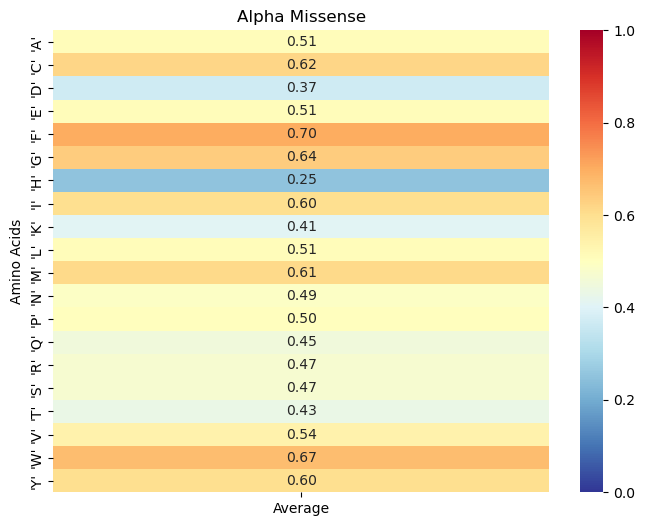

In [15]:
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# Initialize a dictionary to store the sum and count of numerical values for each letter
letter_dict = defaultdict(lambda: {'sum': 0, 'count': 0})

# Directory containing your files
directory = r"C:\Users\kfc\Desktop\GLUTPyMissense"

input_file_path = "D:/GLUTtransporters/patogenicities.txt"
output_directory = os.path.dirname(os.path.abspath(input_file_path))


# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):  # Process only text files
        file_path = os.path.join(directory, filename)
        # Open the .txt file
        with open(file_path, 'r') as file:
            # Read each line in the file
            for line in file:
                # Remove unwanted characters
                line = line.replace('[', '').replace(']', '').replace(',', '')
                # Split the line into words
                words = line.split()
                # The first word is the numerical value
                num_val = float(words[0])
                # The rest of the words are letters
                letters = words[1:]
                # For each letter, add the numerical value to the sum and increment the count
                for letter in letters:
                    letter_dict[letter]['sum'] += num_val
                    letter_dict[letter]['count'] += 1

# Calculate the average for each letter
letter_avg = {}
for letter, data in letter_dict.items():
    avg = round(data['sum'] / data['count'], 2)
    letter_avg[letter] = avg

# Convert the result into a DataFrame
result_df = pd.DataFrame(list(letter_avg.items()), columns=['Letter', 'Average'])

# Create a heatmap using Seaborn with annotations
plt.figure(figsize=(8, 6))
ax = sns.heatmap(result_df.pivot_table(index='Letter', values='Average'), cmap='RdYlBu_r', annot=True, fmt=".2f", vmin=0, vmax=1)
#plt.xlabel('Average')
plt.ylabel('Amino Acids')
plt.title('Alpha Missense')
output_file_path = os.path.join(output_directory, "AlphaMissense_AMK_heatmap.svg")
plt.savefig(output_file_path)
plt.show()
